## Tarea 6 del curso CM-072

* Nombre y apellidos: Luis Vasquez Espinoza
* Fecha de presentación: 17 de octubre

Sea el siguiente código:

In [3]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os

np.random.seed(42)

%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def guardar_fig(fig_id, tight_layout=True):
    print("Guardando figura", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(fig_id + ".png", format='png', dpi=300)

### ¿A qué se refiere `plt.rcParams`? Leer [aquí](https://matplotlib.org/users/customizing.html#matplotlib-rcparams) para más información . ¿Qué otras opciones nos da?.

**Rpta:** rcParams es una variable de tipo diccionario (o similar a uno) que permite configurar parámetros ploteo de manera directa. Otras opciones incluyen:

* Modificación de lineas:

```py
lines.linewidth # ancho de lineal
lines.linestyle # estilo de linea
lines.color     # color de linea
lines.marker    # tipo de marcador
lines.markeredgewidth  # ancho de marcador
lines.markersize       # tamaño de marcador en puntos
...
```

* Modificación de cajas (boxplot): (En su mayoría booleanos para mostrar o no detalles de la caja de ploteo)

```py
boxplot.vertical    : True
boxplot.whiskers    : 1.5 # Margen de separacion de divisiones de referencia
boxplot.showmeans   : False # Mostrar o no la guia de medias
boxplot.showbox     : True
boxplot.showfliers  : True
boxplot.meanline    : False # Mostrar la linea de media
```
* Modificación de fuente:

```py
font.family         : sans-serif
font.style          : normal
font.variant        : normal
font.weight         : medium
font.stretch        : normal
```

* Modificación de comportamiento de texto: (En su mayoría configuracion de LaTex)

```py
text.latex.unicode : False
text.latex.preamble : False
mathtext.cal : cursive
```

### ¿Cómo guardamos las imágenes en el disco?. ¿Cuáles es la semántica de la llamada de esta función?.
**Rpta:** Revisando el metódo:

```py
def guardar_fig(fig_id, tight_layout=True):
    print("Guardando figura", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(fig_id + ".png", format='png', dpi=300)
```

* **plt.tight_layout():**
Funcion que fija el ploteo resultante de tal manera que encaje bien la figura; así solo los labels de los ejes, los labels de los ticks, los títulos y cajas de margen que esten adjuntas a la figura serán consideradas en la imagen final.

* **plt.savefig(fname, dpi, format):**
    * **fname:** Nombre con el que se guardará la figura
    * **dpi:** Resolución de la imagen en puntos por pulgada.
    * **format:** Extensión de guardado de la imagen
    
Por lo tanto, la semántica de la llamada a esta función pide el nombre de la imagen a guardar y si se desea considerar solo los factores adjuntos o anclados al margen de la imagen para ser guardada. Finalmente se guarda la imagen en formato *png* con una resolución de 300 dpi.

### Entrenando un árbol de decisión

Usaremos el conjunto de datos Iris y crearemos un [Decision Tree Classifier](http://scikit-learn.org/stable/modules/tree.html).

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

clf_arbol= DecisionTreeClassifier(max_depth=2, random_state=42)
clf_arbol.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

### 1. Lee los detalles sobre el conjunto de datos de Iris [aquí](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) y [aquí](https://en.wikipedia.org/wiki/Iris_flower_data_set). ¿Qué características están en el conjunto de datos? ¿Cuál es la variable objetivo (y) y qué valores posibles asume?
    
**Rpta:** El dataset posee los siguientes features:

* petal length
* petal width
* sepal length
* sepal width

Y la variable objetivo sería **species**, pudiendo ser Setosa, Versicolour y Virginica

### 2. ¿Qué características estamos manteniendo para nuestro conjunto de entrenamiento (X)? ¿Cómo cambiarías el código para elegir diferentes características?. Modifique este código para ver cómo influye en los resultados.

Como para crear $X$ se usan las columnas desde la 2 en adelante podemos mostrar los nombres de estas columnas a partir de la data original

In [11]:
iris.feature_names[2:]

['petal length (cm)', 'petal width (cm)']

In [34]:
# Modificando los resultados para revisar su influencia
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def modif_tree_model():
    scores = {}
    # Combinatoria de los atributos del dataset para
    # elegir todos los pares de caracteristicas
    for feature_1 in range(4):
        for feature_2 in range(4):
            if feature_1 != feature_2:
                col1 = iris.data[:, feature_1]
                col2 = iris.data[:, feature_2]
                X = np.c_[col1, col2]
                y = iris.target
                
                X_train, X_test, y_train, y_test = train_test_split(X, y)
                
                clf_arbol= DecisionTreeClassifier(max_depth=2, random_state=42)
                clf_arbol.fit(X_train, y_train)
                scores[iris.feature_names[feature_1]+" & "+iris.feature_names[feature_2]]=accuracy_score(y_test, clf_arbol.predict(X_test))
    return scores

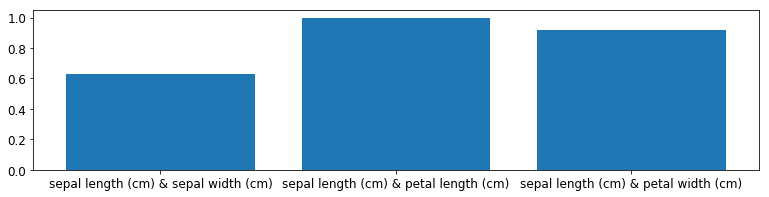

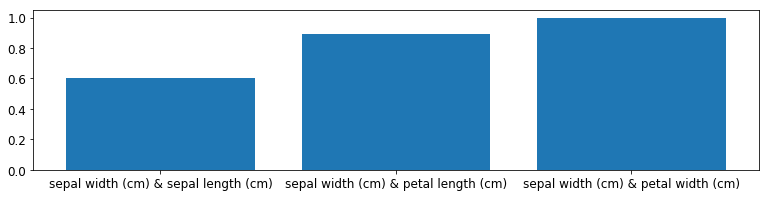

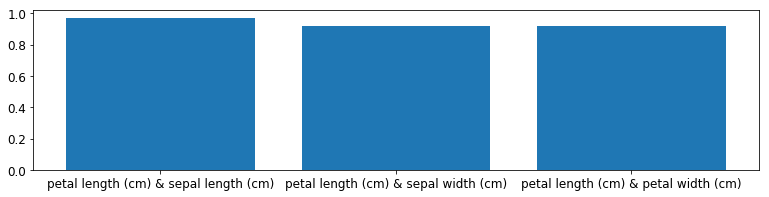

In [85]:
results = modif_tree_model()

import matplotlib.pyplot as plt
for i in range(3):
    plt.figure(figsize=(13, 10))
    plt.subplot(3, 1, i+1)
    r_plot = dict(list(results.items())[3*i:3*(i+1)])
    plt.bar(range(len(r_plot)), list(r_plot.values()), align='center')
    plt.xticks(range(len(r_plot)), list(r_plot.keys()))
plt.show()


Podemos observar algunas combinaciones de *features* de las cuales se obtienen mejores o peores scores simples de **accuracy**, revisando así la influencia en los resultados

### 3. Lea una [explicación de los árboles de decisión](http://scikit-learn.org/stable/modules/tree.html) y luego mire la [documentación] de la función para ver qué parámetros existen. ¿Qué consejos les dan para uso práctico?

* Los árboles de desición tienden a producir *overfitting* al usar muchos *features*. Es bueno balancear el ratio de muestras-*features.
* Es recomendable usar un algoritmo de reducción de dimensión o de selección de características previo al entrenamiento
* Usando *export_graphviz* se puede manejar iterativamente el proceso de formación del árbol, ideal para revisar detalles
* Controlar atributos como *max_depth*, *min_samples_split* o *min_samples_leaf* es ideal para revisar el overfitting, a mayor minimo se generalizará más el modelo
* Balancear el dataset. Hasta entes de leer estas recomendaciones creía que la entropía (que era el unico criterio que conocia para homogeneizar las divisiones en el árbol) se encargaría de todo, pero tiene sentido que se entrene el mismo árbol con un número equivalente de muestras de cada clase.
* Si la matriz de datos $X$ es muy *sparse* se recomienda convertirla a *sparse csc_matrix* antes de usar *fit()*, y concluir con otra conversión a *sparse csr_matrix* antes de usar *predict()*
 
### 4. (Obligatorio) Ten en cuenta que la ganancia de información no es el criterio de selección predeterminado. ¿Cómo cambiamos eso? (Experimenta con esto en tu respuesta). ¿Cómo se compara el valor predeterminado con la ganancia de información? Aquí hay una [publicación](http://haohanw.blogspot.com/2014/08/ml-decision-tree-rule-selection.html) con información útil.

**Rpta:** Podemos cambiar esto en el modelo usando el argumento *criterion=’gini’*, cambiando *gini* por *entropy*.

In [86]:
def modif_tree_model2():
    scores = {}
    # Combinatoria de los atributos del dataset para
    # elegir todos los pares de caracteristicas
    for feature_1 in range(4):
        for feature_2 in range(4):
            if feature_1 != feature_2:
                col1 = iris.data[:, feature_1]
                col2 = iris.data[:, feature_2]
                X = np.c_[col1, col2]
                y = iris.target
                
                X_train, X_test, y_train, y_test = train_test_split(X, y)
                
                clf_arbol= DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
                clf_arbol.fit(X_train, y_train)
                scores[iris.feature_names[feature_1]+" & "+iris.feature_names[feature_2]]=accuracy_score(y_test, clf_arbol.predict(X_test))
    return scores

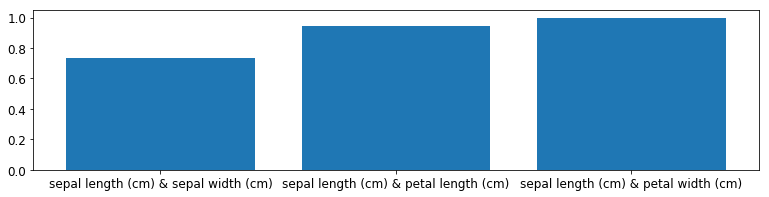

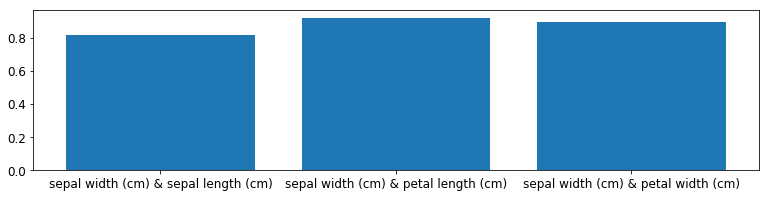

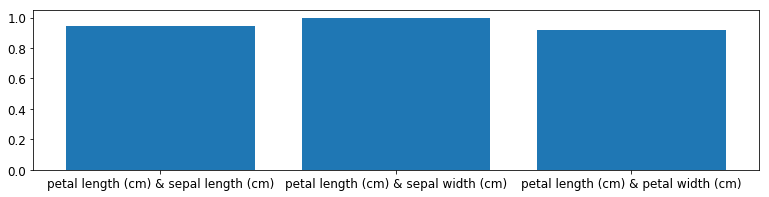

In [87]:
results2 = modif_tree_model()

import matplotlib.pyplot as plt
for i in range(3):
    plt.figure(figsize=(13, 10))
    plt.subplot(3, 1, i+1)
    r_plot = dict(list(results2.items())[3*i:3*(i+1)])
    plt.bar(range(len(r_plot)), list(r_plot.values()), align='center')
    plt.xticks(range(len(r_plot)), list(r_plot.keys()))
plt.show()

El valor predeterminado (**Gini Impurity**) trabaja de manera aleatoria, intentando clasificar el siguiente dato en una clase aleatoria y midiendo qué tan probable es que dicha clasificación sea errónea, mientras que la **Entropía** de toda la vida solo revisa que tanta información se ganó antes y después de generar una bifurcación de decisión.

### 5. `max_depth` se establece en 2. ¿Cómo se relaciona esto con nuestra discusión de sobreajuste? ¿Cómo evitamos el uso de `max_depth`? ¿Puedes encontrar otros parámetros para evitar el sobreajuste?. Muestra en código esos cambios.

**Rpta:** Para el entrenamiento del modelo es evidente: a mayor profundidad del árbol más complejidad presentará el modelo, y como consecuencia memorizará el set de entrenamiento icurriendo en *overfitting*
Para evitar el uso de max_depth podemos preparar la data con *reducción de dimensionalidad* o *selección de features*, además de balancear la data de entrenamiento para evitar el sobre-aprendizaje.
Otros parámetros de ajuste pueden ser **min_samples_split** o **min_samples_leaf** para poder controlar **la mínima cantidad de muestras requeridas para partir un nodo** o **la cantidad mínima de muestras requeridas para ser una hoja** , respectivamente.

In [91]:
# Programando lo establecido

best_tree = DecisionTreeClassifier(random_state=42, max_depth=None, min_samples_split=4, min_samples_leaf=2)
X = iris.data[:, 2:]
y = iris.target

best_tree= DecisionTreeClassifier(max_depth=2, random_state=42)
best_tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

### Visualizando el árbol

In [113]:
from sklearn.tree import export_graphviz

export_graphviz(
        clf_arbol,
        out_file="iris_arbol",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
# No pude mostrar el arbol resultante por problemas con los paquetes sobre jupyter notebook

- ¿Qué características están en su árbol de decisión?. ¿ Cuantos nodos? -¿Cuáles son las distribuciones de clase para las hojas?.

### Visualizando la frontera de decisión

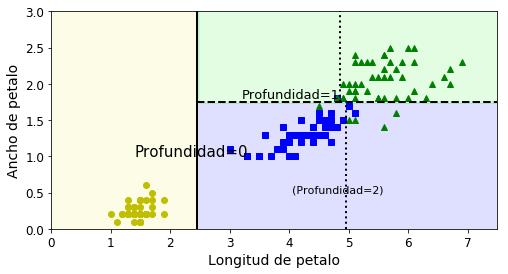

In [114]:
from matplotlib.colors import ListedColormap

def decision_frontera(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_nuevo = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_nuevo).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Longitud de petalo", fontsize=14)
        plt.ylabel("Ancho de petalo", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
decision_frontera(clf_arbol, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Profundidad=0", fontsize=15)
plt.text(3.2, 1.80, "Profundidad=1", fontsize=13)
plt.text(4.05, 0.5, "(Profundidad=2)", fontsize=11)

plt.show()

- Compare su árbol de decisión con el espacio de decisión y anote cualquier correspondencia.
- Modificar el modelo de tu árbol (por ejemplo, diferente profundidad, diferentes criterios de selección). Reescribe tu figura y compara. Es posible que desee cambiar el nombre de la figura para que no se sobrescriba cada vez.

In [8]:
# Tus respuestas

### Predeciendo clases

Una vez que tenga un modelo (árbol), querrá usarlo para hacer predicciones. Las siguientes dos líneas de código muestran dos predicciones diferentes en un ejemplo de prueba `x = [5,1.5]`:

In [9]:
clf_arbol.predict_proba([[5, 1.5]])


array([[0.        , 0.90740741, 0.09259259]])

In [10]:
clf_arbol.predict([[5, 1.5]])

array([1])

### A. Cuál es la diferencia entre estas dos opciones?
El primero predice la probabilidad de clasificación para el par (5, 1.5), resultando más probable que pertenezca a la segunda clase; mientras que la segunda predice dicha clase directamente.

### B. ¿Cómo se determinan las probabilidades?
De la documentación:
"La probabilidad de la predicción de una clase a partir de un output ingresado se calcula como \[...\] la fracción (ratio) de muestras de una misma clase en una hoja."

Es decir, casos favorables entre casos totales. Directamente


### Sensibilidad a los detalles del conjunto de entrenamiento.

Los árboles de decisión tienden a ser sensibles a pequeños cambios en el conjunto de datos. Haremos un experimento para entender esto. Primero, eliminemos el pétalo más ancho del conjunto de entrenamiento (longitud de `4.8` cm y ancho de `1.8` cm):

In [12]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] 

array([[4.8, 1.8]])

In [13]:
no_ancho_versicolor = (X[:, 1]!=1.8) | (y==2) # Encuentra índices de ejemplos que no sean de ancho máximo.
X_d= X[no_ancho_versicolor] # creamos un conjunto de entrenamiento con los pétalos más anchos removidos
y_d = y[no_ancho_versicolor]

clf_arbol_d = DecisionTreeClassifier(max_depth=2, random_state=40) 
clf_arbol_d.fit(X_d, y_d)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

Dibujamos el nuevo resultado:

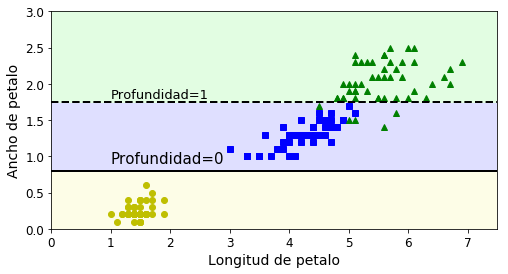

In [14]:
plt.figure(figsize=(8, 4))
decision_frontera(clf_arbol_d, X_d, y_d, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Profundidad=0", fontsize=15)
plt.text(1.0, 1.80, "Profundidad=1", fontsize=13)
plt.show()

### C. ¿Cómo difiere esto de la frontera de decisión anterior? ¿Hay alguna manera de mitigar este efecto?

El eliminar el dato máximo del conjunto de entrenamiento supone que el criterio de bifurcación del nodo que establecía si un dato presentaba dimensiones entre dicho máximo y otro margen (como algún cuartil del rango de dimensiones) se desplace a usar otro nuevo valor o a secas no considerar dicha bifurcación a dicha profundidad en el árbol, lo cual sucede en este caso. Para mitigar este efecto podríamos *considerar un max_depth mayor* (pudiendo incurrir en overfitting) o *variar los min_samples_split o min_samples_leaf* para aumentar